In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = np.array([4,3,4,5,5,2,3,1,4,0,1,5,5,6,5,4,4,5,3,4])

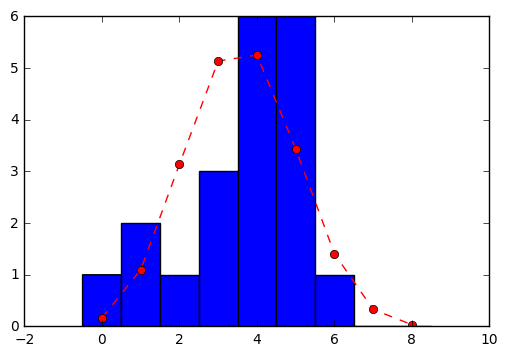

In [4]:
x = np.arange(-0.5,9.5,1.)
x_int = np.arange(0,9,1)
plt.hist(data,bins=x)
plt.plot(x_int,stats.binom.pmf(x_int,8,0.45)*20,'o--',c='r')


In [8]:
const = np.ones(data.shape[0])
model = sm.GLM(np.array([data,8-data]).T,const,family=sm.families.Binomial())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y1', 'y2']   No. Observations:                   20
Model:                            GLM   Df Residuals:                       19
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -37.748
Date:                Wed, 01 Mar 2017   Deviance:                       28.722
Time:                        14:50:53   Pearson chi2:                     24.5
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1754      0.159     -1.105      0.269        -0.487     0.136
==============================================================================
"""

In [9]:
q = 1. / (1+np.exp(-result.params[0]))
q

0.45624999999999993

In [12]:
y = np.arange(0.01,1.0,0.01)
llhs = np.array([np.sum(stats.binom.logpmf(data,8,q)) for q in y])

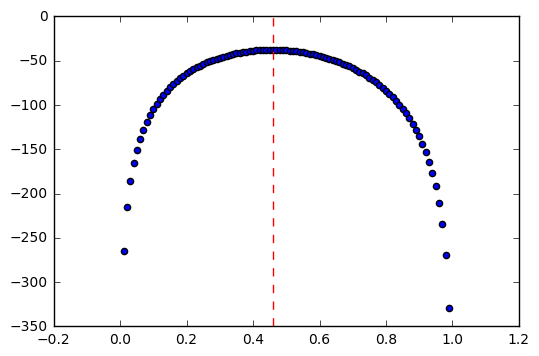

In [17]:
plt.scatter(y,llhs)
plt.axvline(y[llhs.argmax()],ls='--',c='r')

In [18]:
y[llhs.argmax()]

0.46000000000000002

In [19]:
np.random.randint(2,size=100)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0])

In [21]:
def series_llf(q,step=100):
    series = [[0,q]]
    llh = np.sum(stats.binom.logpmf(data,8,q))
    for i in range(step):
        random = np.random.randint(2)
        if random ==1:
            cal = np.sum(stats.binom.logpmf(data,8,q+0.01))
            if cal > llh:
                llh = cal
                q += 0.01
        else:
            cal = np.sum(stats.binom.logpmf(data,8,q-0.01))
            if cal > llh:
                llh = cal
                q -= 0.01
        series.append([i,q])
    
    return np.array(series)

init_3 = series_llf(0.3)
init_6 = series_llf(0.6)

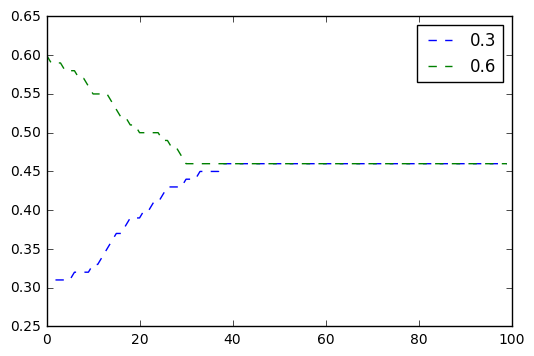

In [23]:
plt.plot(init_3[:,0],init_3[:,1],ls='--',label='0.3')
plt.plot(init_6[:,0],init_6[:,1],ls='--',label='0.6')
plt.legend(loc='upper right')

In [26]:
def metro(q,size):
    llh = np.sum(stats.binom.logpmf(data,8,q))
    series = [[0,q]]
    for i in range(size):
        random = np.random.randint(2)
        if random == 1:
            cal = np.sum(stats.binom.logpmf(data,8,q+0.01))
            if cal > llh:
                llh = cal
                q += 0.01
            elif np.random.rand() < np.exp(cal - llh):
                llh = cal
                q += 0.01
        else:
            cal = np.sum(stats.binom.logpmf(data,8,q-0.01))
            if cal > llh:
                llh = cal
                q -= 0.01
            elif np.random.rand() < np.exp(cal - llh):
                llh = cal
                q -= 0.01
        
        series.append([i,q])
    
    return np.array(series)

In [28]:
init_3_100 = metro(0.3,100)
init_3_1000 = metro(0.3,1000)
init_3_10000 = metro(0.3,10000)

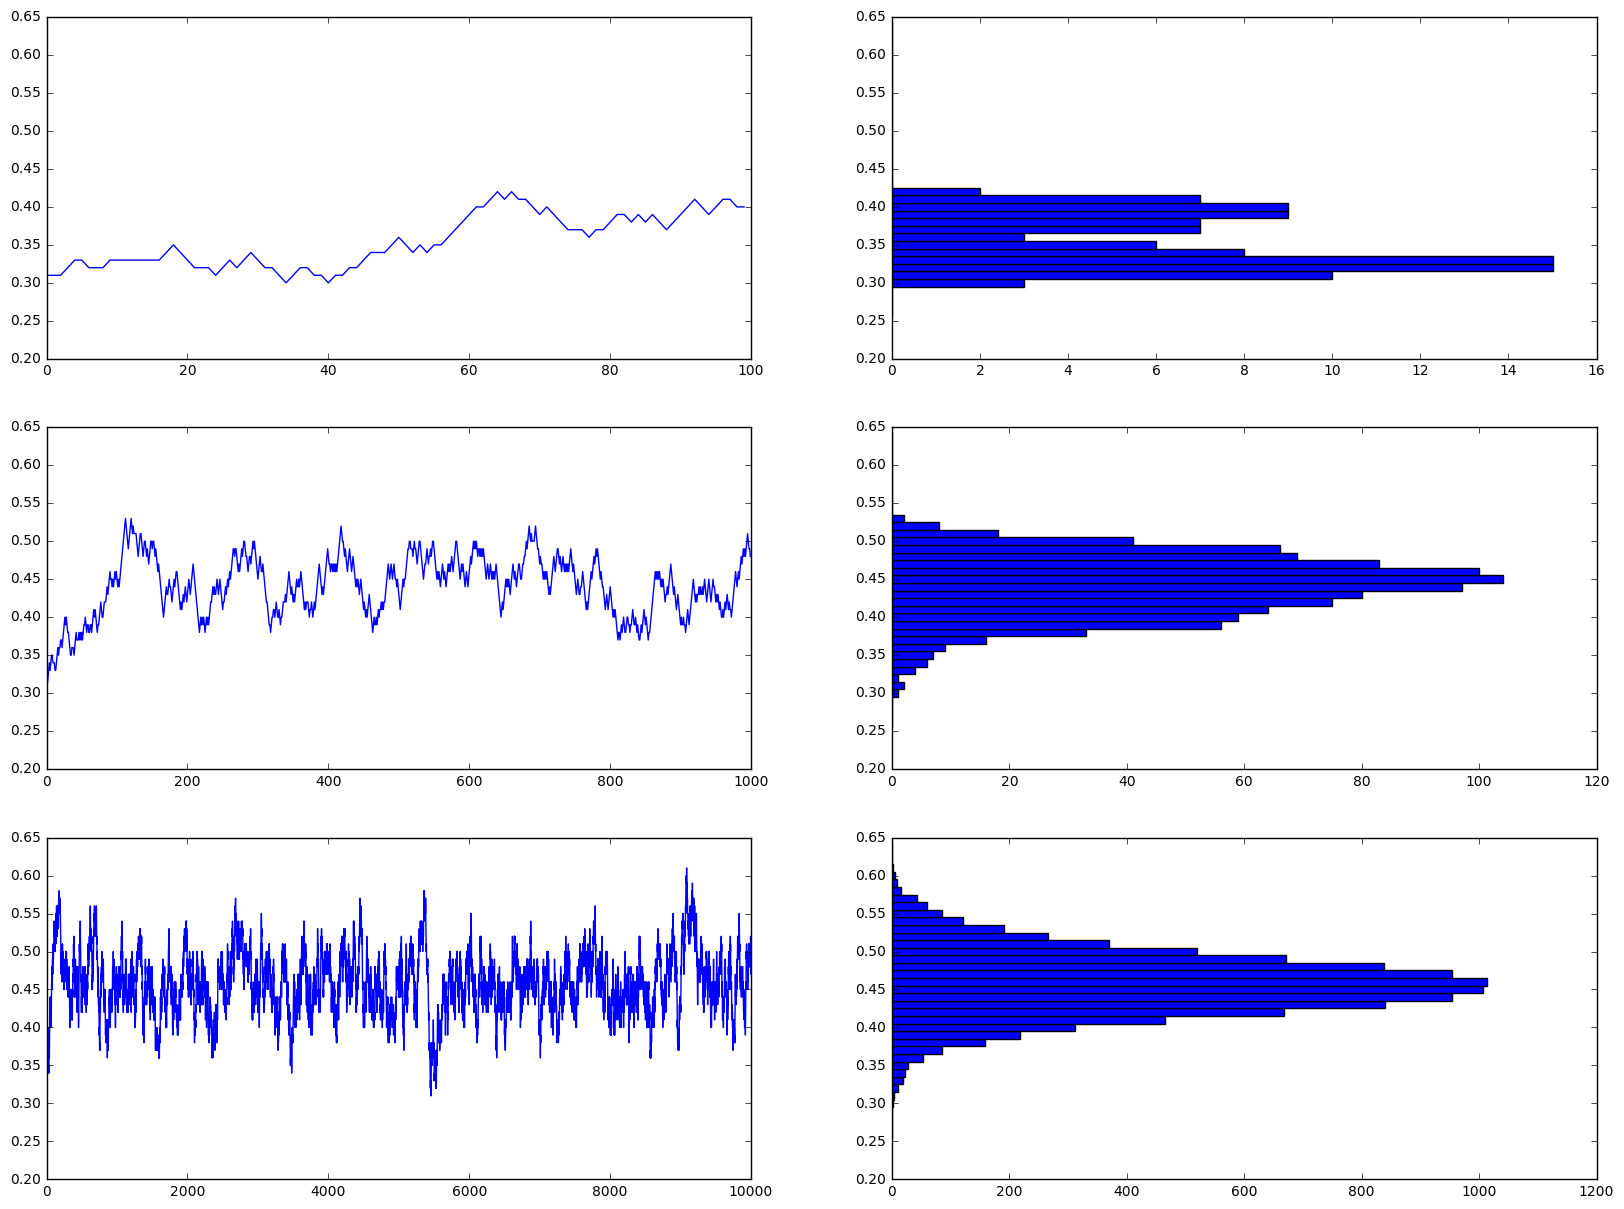

In [33]:
fig,ax = plt.subplots(3,2,figsize=(20,15))
steps = [init_3_100,init_3_1000,init_3_10000]
for i,step in enumerate(steps):
    ax[i][0].plot(step[:,0],step[:,1])
    ax[i][0].set_ylim((0.2,0.65))
    ax[i][1].hist(step[:,1],orientation='horizontal',bins=np.arange(0.245,0.655,0.01))

In [34]:
y = np.arange(0.25,0.66,0.01)
llhs = np.array([np.sum(stats.binom.logpmf(data,8,q)) for q in y])
lhs = np.exp(llhs)
P_q_Y = lhs / np.sum(lhs)

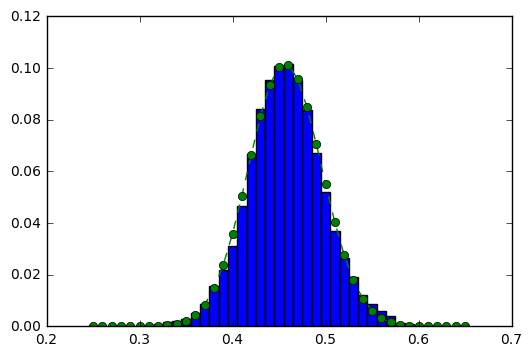

In [36]:
plt.hist(init_3_10000[:,1],bins=np.arange(0.245,0.655,0.01),weights=np.ones((init_3_10000.shape[0]))*0.0001)
plt.plot(y,P_q_Y,'o--')